In [1]:
import json
from collections import Counter
from hazm import word_tokenize, Normalizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
with open('../data/pytopia.json') as f:
    data = json.load(f)

In [3]:
msg_iter = iter(data['messages'])

In [4]:
normalizer = Normalizer()

In [5]:
stop_words = open('stopwords.txt').readlines()
stop_words = list(map(str.strip, stop_words))
stop_words = list(map(normalizer.normalize, stop_words))

In [11]:
text_content = ''

for msg in data['messages']:
    if type(msg['text']) is str:
        tokens = word_tokenize(msg['text'])
        tokens = list(filter(lambda item: item not in stop_words, tokens))
        
        text_content += f"{' '.join(tokens)}"
          # text_content += msg['text']

In [12]:
# Counter(word_tokenize(text_content)).most_common()
# text_content

In [13]:
text_content  = normalizer.normalize(text_content)

In [18]:
text_content = arabic_reshaper.reshape(text_content[:len(text_content)-10000])
text_content = get_display(text_content)

(-0.5, 399.5, 199.5, -0.5)

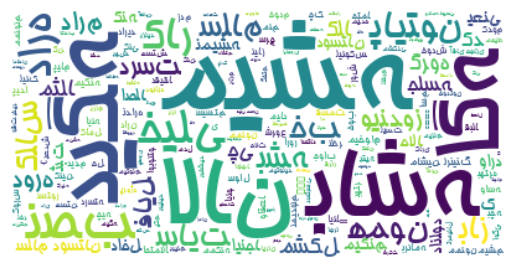

In [21]:
w = WordCloud(font_path='./BHoma.ttf', background_color='white').generate(text_content)

plt.imshow(w, interpolation='bilinear')
plt.axis('off')

In [22]:
from loguru import logger

ModuleNotFoundError: No module named 'loguru'